#Лабораторная работа №1
Студентка Самсонова Валерия, группа М8О-107М-22

Выберем две фукнции оптимизации и найдем их мимнимумы с помощью градиентного спуска

Подключаем необходимые библиотеки

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

Записываем функцию Гольдшейна-Прайса и ее частные производные

In [ ]:
#Функция Гольдшейна-Прайса
def GP_E(x,y):
  return (1+(x+y+1)**2 * (19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+(2*x-3*y)**2 * (18-32*x+12*x**2+48*y-36*x*y+27*y**2))
#Производная по x
def GP_dEdx(x,y):
  return 24*(8*x**3-4*x**2*(9*y-4)+6*x*(9*y**2+8*y+1)-9*y*(3*y**2+4*y+1))*((3*x**2+2*x*(3*y-7)+3*y**2-14*y+19)*(x+y+1)**2+1)+12*(x**3+x**2*(3*y-2)+x*(3*y**2-4*y-1)+y**3-2*y**2-y+2)*((12*x**2-4*x*(9*y+8)+3*(9*y**2+16*y+6))*(2*x-3*y)**2+30)
#Производная по y
def GP_dEdy(x,y):
  return 12*(x**3+x**2*(3*y-2)+x*(3*y**2-4*y-1)+y**3-2*y**2-y+2)*((12*x**2-4*x*(9*y+8)+3*(9*y**2+16*y+6))*(2*x-3*y)**2+30)-36*(8*x**3-4*x**2*(9*y+4)+6*x*(9*y**2+8*y+1)-9*y*(3*y**2+4*y+1))*((3*x**2+2*x*(3*y-7)+3*y**2-14*y+19)*(x+y+1)**2+1)

Записываем функцию Химмельблау и ее частные производные

In [ ]:
#Функция Химмельблау
def H_E(x,y):
  return (x**2+y-11)**2+(x+y**2-7)**2
#Производная по x
def H_dEdx(x,y):
  return 2*(2*x*(x**2+y-11)+x+y**2-7)
#Производная по y
def H_dEdy(x,y):
  return 2*(x**2+2*y*(x+y**2-7)+y-11)

Метод градиентного спуска

In [ ]:
def GradientDescent(E, dEdx, dEdy, x0, y0, LearningRate, Iterations, PlotMin, PlotMax):
  '''
  E - функция
  dEdx, dEdy - частные производные функции
  x0, y0 - начальные приближения точки
  LearningRate - скорость обучения
  Iterations - количество итераций
  PlotMin, PlotMax - область определения функции
  '''
  x_plt = np.arange(PlotMin,PlotMax,0.1)
  y_plt = np.arange(PlotMin,PlotMax,0.1)
  E_plt = np.array([[E(x,y) for x in x_plt] for y in y_plt])
  #интерактивное отображения графика
  plt.ion()
  fig = plt.figure()
  ax = Axes3D(fig)
  #Создание графика
  x, y = np.meshgrid(x_plt,y_plt)
  ax.plot_surface(x,y, E_plt, color='y', alpha=0.5)
  #Подписи осей
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('E')
  #Точка
  Point = ax.scatter(point[0], point[1], E(point[0], point[1]), c='red')
  #Алгоритм градиентного спуска
  x1=x0-LearningRate * dEdx(x0,y0)
  y1=y0-LearningRate * dEdy(x0,y0)
  for _ in range(Iterations):
    x0=x1
    y0=y1
    x1=x0-LearningRate * dEdx(x0,y0)
    y1=y0-LearningRate * dEdy(x0,y0)
    ax.scatter(x1,y1,E(x1,y1), c='red')
    #перерисовка графика
    fig.canvas.draw()
    fig.canvas.flush_events()
    #Задержка отрисовки, чтобы видеть передвижение точки
    time.sleep(0.01)
    #Вывод значений на консоль
  print('x={0}, y={1}, E={2}'.format(x1,y1,E(x1,y1)))
  #Выключение интерактивного отображения
  plt.ioff()
  plt.show()

Тест для функции Гольдшейна-Прайса

x=-0.02388372737902966, y=-0.99586390078332, E=3.1704106379875308


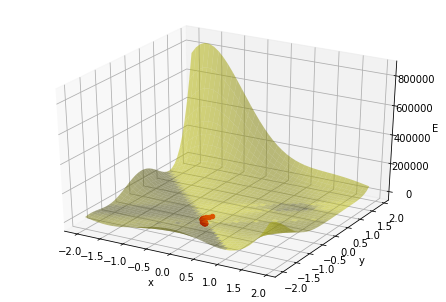

In [ ]:
GPStopPoint = GradientDescent(GP_E, GP_dEdx, GP_dEdy, -0.2, 0.2, 0.0001, 50, -2, 2 )

Тест для функции Химмельблау

x=-2.8359243799109835, y=3.14566737806716, E=0.038910933939490015


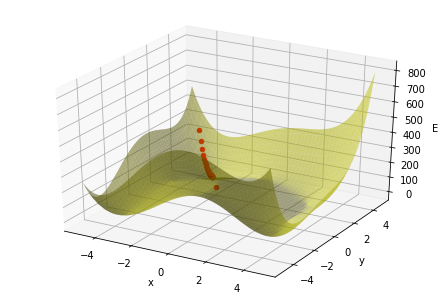

In [ ]:
HStopPoint = GradientDescent(H_E, H_dEdx, H_dEdy, -5, 5, 0.001, 50, -5, 5 )

Стохастический градиентный спуск моментный

In [ ]:
def StochasticGradientDescent(E, dEdx, dEdy, x0, y0, LearningRate, Iterations, PlotMin, PlotMax, m):
  '''
  E - функция
  dEdx, dEdy - частные производные функции
  x0, y0 - начальные приближения точки
  LearningRate - скорость обучения
  Iterations - количество итераций
  PlotMin, PlotMax - область определения функции
  m - моментная характеристика
  '''
  x_plt = np.arange(PlotMin,PlotMax,0.1)
  y_plt = np.arange(PlotMin,PlotMax,0.1)
  E_plt = np.array([[E(x,y) for x in x_plt] for y in y_plt])
  #интерактивное отображения графика
  plt.ion()
  fig = plt.figure()
  ax = Axes3D(fig)
  #Создание графика
  x, y = np.meshgrid(x_plt,y_plt)
  ax.plot_surface(x,y, E_plt, color='y', alpha=0.5)
  #Подписи осей
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('E')
  #Точка
  Point = ax.scatter(point[0], point[1], E(point[0], point[1]), c='red')
  #Алгоритм градиентного спуска
  x1=x0-LearningRate * dEdx(x0,y0)
  y1=y0-LearningRate * dEdy(x0,y0)
  for n in range(Iterations):
    x0=x1
    y0=y1

    if n==0:
      vx = dEdx(x0,y0)
      vy = dEdy(x0,y0)
    else:
      vx = m * vx + dEdx(x0,y0)
      vy = m * vy + dEdy(x0,y0)

    x1=x0-LearningRate * vx
    y1=y0-LearningRate * vy
    ax.scatter(x1,y1,E(x1,y1), c='red')
    #перерисовка графика
    fig.canvas.draw()
    fig.canvas.flush_events()
    #Задержка отрисовки, чтобы видеть передвижение точки
    time.sleep(0.01)
    #Вывод значений на консоль
  print('x={0}, y={1}, E={2}'.format(x1,y1,E(x1,y1)))
  #Выключение интерактивного отображения
  plt.ioff()
  plt.show()

Тест для функции Гольдшейна-Прайса

x=-0.023208189299014664, y=-0.9963163353710371, E=3.158342332478839


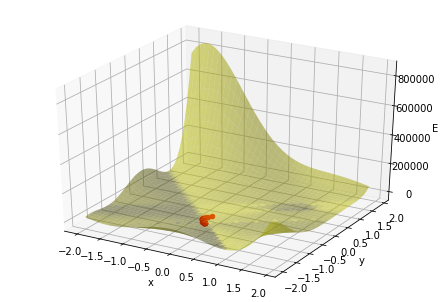

In [ ]:
GPStopPoint = StochasticGradientDescent(GP_E, GP_dEdx, GP_dEdy, -0.2, 0.2, 0.0001, 50, -2, 2, 0.01 )

Тест для функции Химмельблау

x=-2.8347482747484234, y=3.1450024593176864, E=0.03585753811385986


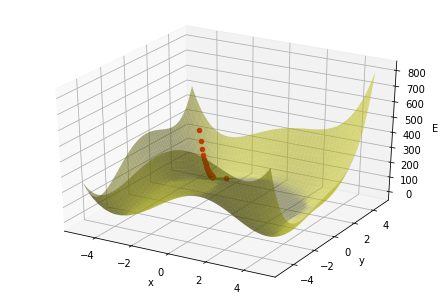

In [ ]:
HStopPoint = StochasticGradientDescent(H_E, H_dEdx, H_dEdy, -5, 5, 0.001, 50, -5, 5, 0.01 )

Градиентный спуск Adagrad

In [ ]:
def AdagradGradientDescent(E, dEdx, dEdy, point, LearningRate, Iterations, PlotMin, PlotMax):
  '''
  E - функция
  dEdx, dEdy - частные производные функции
  point - начальные приближения точки
  LearningRate - скорость обучения
  Iterations - количество итераций
  PlotMin, PlotMax - область определения функции
  '''
  x_plt = np.arange(PlotMin,PlotMax,0.1)
  y_plt = np.arange(PlotMin,PlotMax,0.1)
  E_plt = np.array([[E(x,y) for x in x_plt] for y in y_plt])
  #интерактивное отображения графика
  plt.ion()
  fig = plt.figure()
  ax = Axes3D(fig)
  #Создание графика
  x, y = np.meshgrid(x_plt,y_plt)
  ax.plot_surface(x,y, E_plt, color='y', alpha=0.5)
  #Подписи осей
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('E')
  #Точка
  Point = ax.scatter(point[0], point[1], E(point[0], point[1]), c='red')
  #Алгоритм градиентного спуска
  s_sum_x = 0
  s_sum_y = 0
  x1=point[0]-LearningRate * dEdx(point[0], point[1])
  y1=point[1]-LearningRate * dEdy(point[0], point[1])
  for _ in range(Iterations):
    point[0]=x1
    point[1]=y1
    s_sum_x += dEdx(point[0], point[1])**2
    s_sum_y += dEdy(point[0], point[1])**2

    x1 = point[0] - LearningRate * (dEdx(point[0], point[1]) / math.sqrt(s_sum_x))
    y1 = point[1] - LearningRate * (dEdy(point[0], point[1]) / math.sqrt(s_sum_y))

    ax.scatter(point[0],point[1],E(point[0],point[1]), c='red')
    #перерисовка графика
    fig.canvas.draw()
    fig.canvas.flush_events()
    #Задержка отрисовки, чтобы видеть передвижение точки
    time.sleep(0.01)
  print('x={0}, y={1}, E={2}'.format(x1,y1,E(x1,y1)))
  #Выключение интерактивного отображения
  plt.ioff()
  plt.show()

Тест для функции Гольдшейна-Прайса

x=-0.08594327837944, y=-0.9989951356664428, E=5.08479588340021


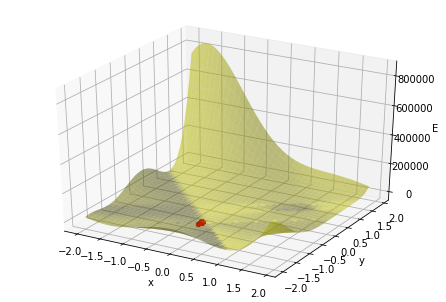

In [ ]:
point = np.array([-0.1,-1.1])
GPStopPoint = AdagradGradientDescent(GP_E, GP_dEdx, GP_dEdy, point, 0.001, 100, -2, 2)

Тест для функции Химмельблау

x=-2.0000092957294116, y=3.00000632930408, E=15.999651904250776


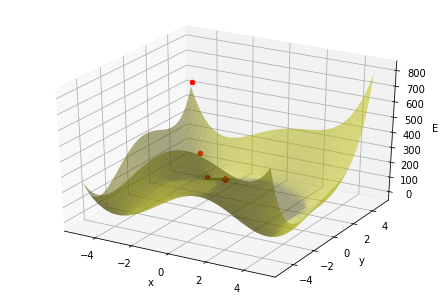

In [ ]:
point = np.array([-5,5])
HStopPoint = AdagradGradientDescent(H_E, H_dEdx, H_dEdy, point, 0.0001, 100, -5, 5)